In [2]:
 %reload_ext autoreload

import torch
import torch.nn.functional as F
import model, utils
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms

In [3]:
device = utils.get_device()

CUDA Available:  True


In [4]:
x, y = 28, 28
mean = 0.1307
std = 0.3081

In [5]:
train_transforms = transforms.Compose([
                    # Instead of 22 it would be random later on
                    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
                    transforms.Resize((x,  y)),
                    transforms.RandomRotation((-15., 15.), fill=0),
                    transforms.ToTensor(),
                    transforms.Normalize((mean,), (std,)),
                    ])
test_transforms = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((mean,), (std,))
                    ])

In [6]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 153249087.69it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 20939618.64it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 65036876.72it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20331407.44it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [7]:
batch_size = 256

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

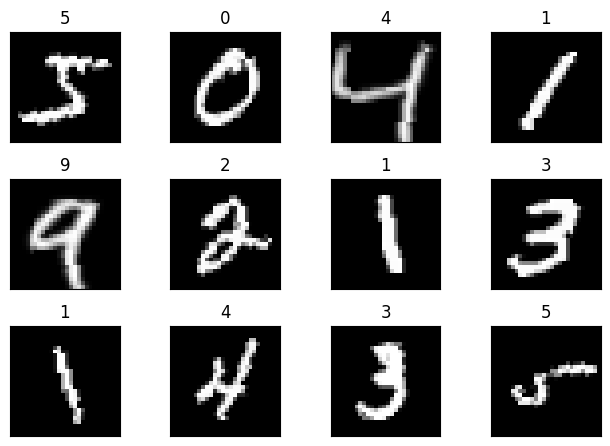

In [8]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [9]:
cnn_model = model.Net().to(device) #utils.send_model_to_device(model.Net, device)

In [10]:
optimizer = optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)

Adjusting learning rate of group 0 to 1.0000e-02.


In [11]:
utils.run_for_epoch(20, cnn_model, device, train_loader, test_loader, optimizer, scheduler)

Epoch 1


Train: Loss=0.1756 Batch_id=234 Accuracy=80.53: 100%|██████████| 235/235 [01:41<00:00,  2.33it/s]


Test set: Average loss: 0.0634, Accuracy: 9808/10000 (98.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1393 Batch_id=234 Accuracy=97.31: 100%|██████████| 235/235 [01:41<00:00,  2.32it/s]


Test set: Average loss: 0.0432, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1740 Batch_id=234 Accuracy=98.08: 100%|██████████| 235/235 [01:41<00:00,  2.31it/s]


Test set: Average loss: 0.0369, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1632 Batch_id=234 Accuracy=98.25: 100%|██████████| 235/235 [01:43<00:00,  2.27it/s]


Test set: Average loss: 0.0309, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.2257 Batch_id=234 Accuracy=98.46: 100%|██████████| 235/235 [01:40<00:00,  2.35it/s]


Test set: Average loss: 0.0278, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1446 Batch_id=234 Accuracy=98.60: 100%|██████████| 235/235 [01:41<00:00,  2.32it/s]


Test set: Average loss: 0.0239, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1484 Batch_id=234 Accuracy=98.64: 100%|██████████| 235/235 [01:41<00:00,  2.31it/s]


Test set: Average loss: 0.0240, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1209 Batch_id=234 Accuracy=98.81: 100%|██████████| 235/235 [01:40<00:00,  2.34it/s]


Test set: Average loss: 0.0225, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1443 Batch_id=234 Accuracy=98.89: 100%|██████████| 235/235 [01:41<00:00,  2.31it/s]


Test set: Average loss: 0.0204, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.1083 Batch_id=234 Accuracy=98.91: 100%|██████████| 235/235 [01:40<00:00,  2.34it/s]


Test set: Average loss: 0.0206, Accuracy: 9936/10000 (99.36%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.1494 Batch_id=234 Accuracy=98.92: 100%|██████████| 235/235 [01:40<00:00,  2.34it/s]


Test set: Average loss: 0.0210, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1389 Batch_id=234 Accuracy=98.97: 100%|██████████| 235/235 [01:41<00:00,  2.30it/s]


Test set: Average loss: 0.0203, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.1148 Batch_id=234 Accuracy=98.99: 100%|██████████| 235/235 [01:40<00:00,  2.33it/s]


Test set: Average loss: 0.0205, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0958 Batch_id=234 Accuracy=99.01: 100%|██████████| 235/235 [01:40<00:00,  2.33it/s]


Test set: Average loss: 0.0176, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.1203 Batch_id=234 Accuracy=99.01: 100%|██████████| 235/235 [01:42<00:00,  2.30it/s]


Test set: Average loss: 0.0191, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.1427 Batch_id=234 Accuracy=99.21: 100%|██████████| 235/235 [01:42<00:00,  2.29it/s]


Test set: Average loss: 0.0171, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.1767 Batch_id=234 Accuracy=99.21: 100%|██████████| 235/235 [01:41<00:00,  2.30it/s]


Test set: Average loss: 0.0168, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.1130 Batch_id=234 Accuracy=99.31: 100%|██████████| 235/235 [01:43<00:00,  2.27it/s]


Test set: Average loss: 0.0164, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.1045 Batch_id=234 Accuracy=99.29: 100%|██████████| 235/235 [01:42<00:00,  2.29it/s]


Test set: Average loss: 0.0164, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.1631 Batch_id=234 Accuracy=99.28: 100%|██████████| 235/235 [01:42<00:00,  2.29it/s]


Test set: Average loss: 0.0161, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-03.


In [12]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model.Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
           Dropout-4           [-1, 32, 26, 26]               0
            Conv2d-5           [-1, 16, 26, 26]             512
              ReLU-6           [-1, 16, 26, 26]               0
       BatchNorm2d-7           [-1, 16, 26, 26]              32
           Dropout-8           [-1, 16, 26, 26]               0
            Conv2d-9           [-1, 32, 24, 24]           4,608
             ReLU-10           [-1, 32, 24, 24]               0
      BatchNorm2d-11           [-1, 32, 24, 24]              64
          Dropout-12           [-1, 32, 24, 24]               0
    

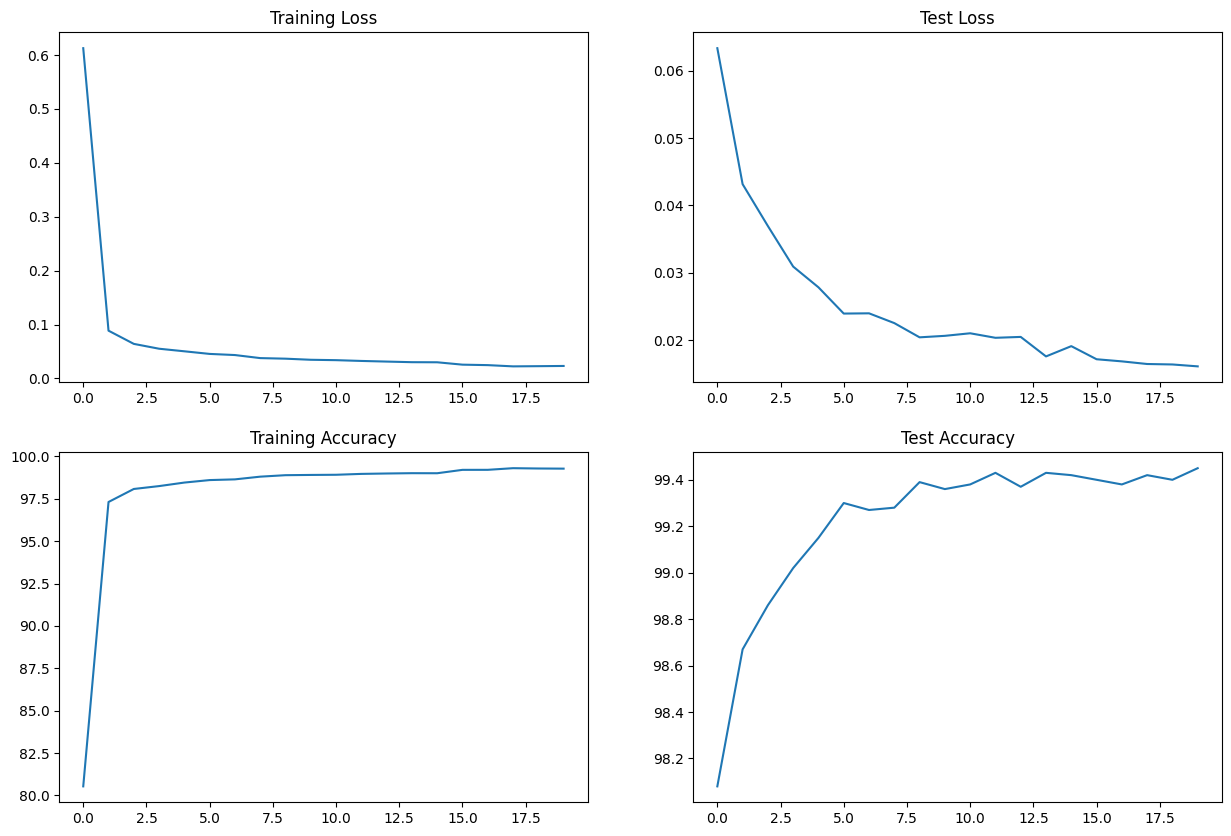

In [13]:
utils.plot_loss_accuracy_graph()